<a href="https://colab.research.google.com/github/igor531205/data_science/blob/main/lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

### Представление и интерпретация моделей машинного обучения.

---

Проведите исследование для датасета [Travel Reviews](https://archive.ics.uci.edu/dataset/484/travel+reviews).

Задача 1. Разбейте датасет на пять кластеров (после анализа корреляций и шкалирования);

Задача 2. Представьте описание групп пользователей сервиса TripAdvisor со схожими интересами в терминах предметной области:
* приведите табличку со средними оценками, которые выставляют пользователи различным локациям;
* приведите график: ящики с усами с разбивкой по переменным и кластерам;
* для любых двух признаков из 10 проведите статистический вывод (попарный t–критерий) с интерпретацией;
* охарактеризуйте кластеры в терминах предметной области: какие сходные интересы имеют пользователи в каждой группе.
---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings as warn
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

# отключаем предупреждения
warn.filterwarnings('ignore')

*Загружаем данные по ссылке*



In [2]:
# ссылка на датасет
link = 'https://raw.githubusercontent.com/igor531205/data_science/main/datasets/tripadvisor_review.csv'

# Считываем данные
df=pd.read_csv(link, index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
df.head(n=5)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


*Выведем сводную информацию о DataFrame*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


*Выведем все столбцы*

In [4]:
df.columns

Index(['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10'],
      dtype='object')

Columns:
* User ID: Unique user id;
* Category 1: Average user feedback on art galleries;
* Category 2: Average user feedback on dance clubs;
* Category 3: Average user feedback on juice bars;
* Category 4: Average user feedback on restaurants;
* Category 5: Average user feedback on museums;
* Category 6: Average user feedback on resorts;
* Category 7: Average user feedback on parks/picnic spots;
* Category 8: Average user feedback on beaches;
* Category 9: Average user feedback on theaters;
* Category 10: Average user feedback on religious institutions.

*Выведем информацию по количественным признакам*

In [5]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


*Выведем размеры таблицы (кол-во строк, кол-во столбцов)*

In [6]:
df.shape

(980, 11)

*Выведем признаки*

In [7]:
# Количественные признаки в датасете
features = df.columns[1:]
features

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'],
      dtype='object')

*Выведем гистограммы частот непрерывных признаков*

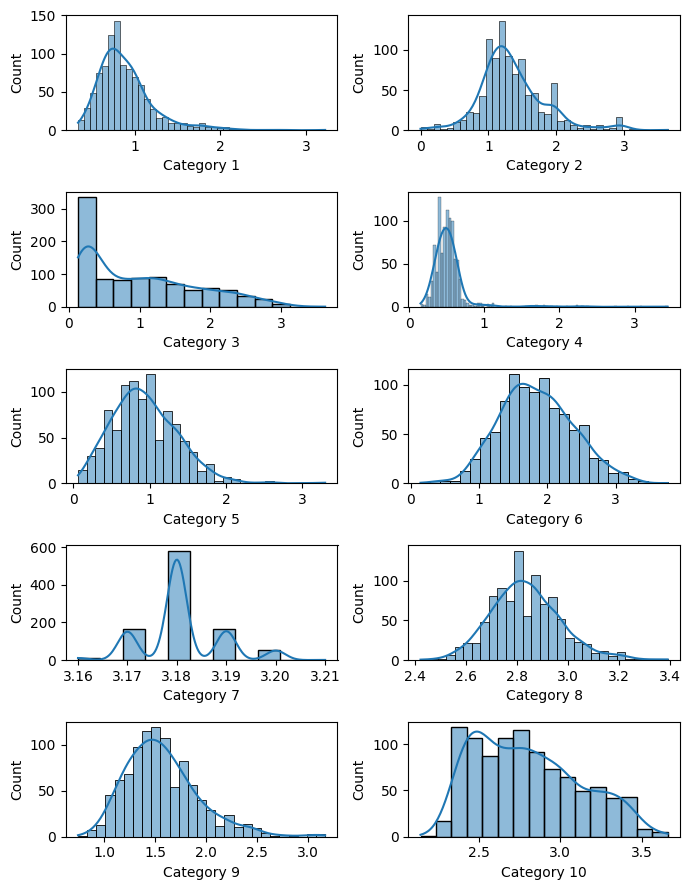

In [8]:
# Создание гистограмм для каждого признака
fig, ax = plt.subplots(5, 2, figsize=(7, 9))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=ax[i])

plt.tight_layout()
plt.show()

*Построим корреляцию непрерывных признаков*

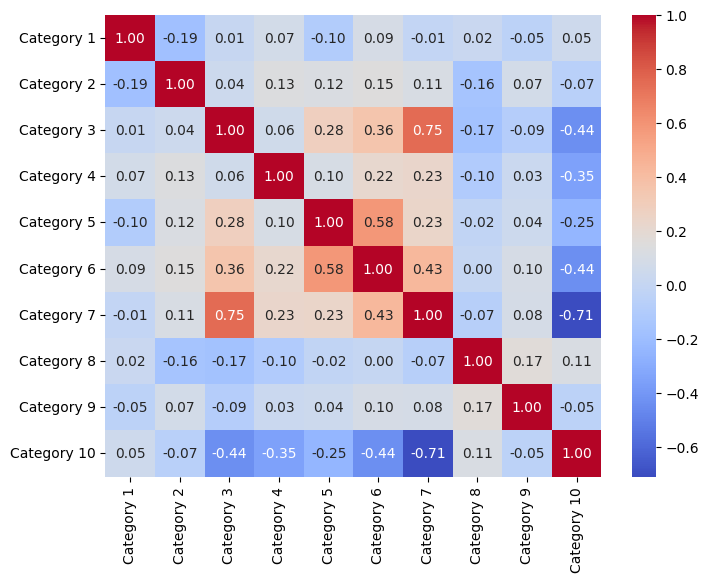

In [9]:
# Расчет корреляций между непрерывными признаками
correlation_matrix = df[features].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Анализ матрицы корреляции:

*   сильная положительная корреляция (0.75) наблюдается м/у категориями 3 и 7 (если пользователи высоко оценивают одну из этих категорий, то скорее всего они высоко оценят и другую);
*   сильная отрицательная корреляция (-0,71) наблюдается м/у категориями 7 и 10 (если пользователи высоко оценивают одну из этих категорий, то скорее всего они низко оценят другую);
*   средняя положительная корреляция (0.58) наблюдается м/у категориями 5 и 6;
*   средняя отрицательная корреляция (-0,44) наблюдается м/у категориями 3 и 10, а также 6 и 10.



*Выполним масштабирование признаков*

In [10]:
# Масштабирование признаков
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

# Создание датасета с масштабироваными признаками
df_scaled = pd.DataFrame(data_scaled, columns=features)

# Выводим 5 первых строк
df_scaled.head(n=5)

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010


*Проверим датасет с масштабироваными признаками*

In [11]:
df_scaled.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,-2.718914e-17,5.437827e-17,-8.972415e-17,5.147810e-16,-4.440892e-17,1.640411e-16,-1.944476e-14,-1.500840e-15,-2.356392e-16,-9.153676e-16
std,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00
min,-1.693043e+00,-2.829519e+00,-1.120656e+00,-1.368082e+00,-2.012171e+00,-3.157826e+00,-2.677437e+00,-3.020048e+00,-2.275906e+00,-2.052279e+00
25%,-6.830819e-01,-5.702755e-01,-9.430372e-01,-4.381438e-01,-6.855674e-01,-7.100398e-01,-1.200410e-01,-6.916798e-01,-7.118768e-01,-8.070103e-01
50%,-1.934040e-01,-1.518970e-01,-2.452487e-01,-1.162422e-01,-9.088308e-02,-7.954928e-02,-1.200410e-01,-1.095877e-01,-8.077737e-02,-5.984914e-02
75%,3.880885e-01,4.338329e-01,7.094529e-01,1.698925e-01,5.952912e-01,6.622042e-01,-1.200410e-01,5.452658e-01,5.228829e-01,7.495755e-01
max,7.121160e+00,4.784969e+00,3.307129e+00,1.039921e+01,5.398511e+00,3.555043e+00,3.716053e+00,4.037818e+00,4.391797e+00,2.679742e+00


*Определение оптимального числа кластеров*

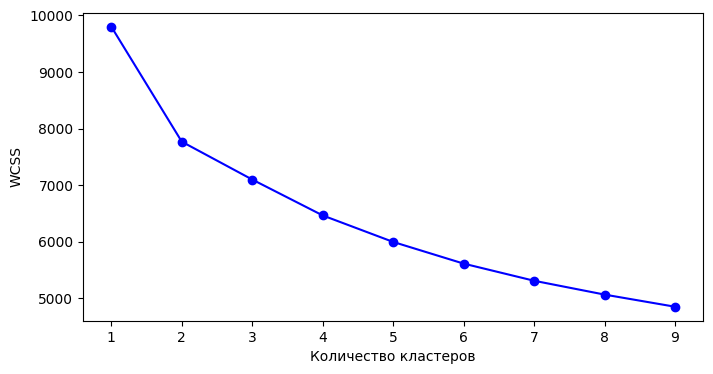

In [12]:
# Функция для расчета WCSS
def calculate_wcss(data):
    wcss = []
    for n in range(1, 10):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Расчет WCSS
wcss = calculate_wcss(df_scaled)

# Визуализация расчета WCSS
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

*Разобьм датасет на пять кластеров*

In [13]:
# Установим количество кластеров
num_clusters = 5

# Применим кластеризацию с помощью k–средних
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Выведем количество для каждого кластера
cluster_counts = Counter(sorted(cluster_labels))
for cluster, count in cluster_counts.items():
    print(f'Кластер {cluster}: {count}')

Кластер 0: 94
Кластер 1: 294
Кластер 2: 265
Кластер 3: 306
Кластер 4: 21


In [14]:
# Выполним PCA для сокращения данных до 3 измерений для визуализации
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Создание нового датасета для визуализации
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels

# Создание 3D графика
fig = go.Figure()

# Добавление точек для каждого кластера
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(x=cluster_data['PC1'], y=cluster_data['PC2'], z=cluster_data['PC3'],
                               mode='markers',
                               name=f'Кластер {cluster}',
                               marker=dict(size=3)))

# Настройка внешнего вида графика
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(
                      xaxis_title='PC1',
                      yaxis_title='PC2',
                      zaxis_title='PC3'))

# Показ графика
fig.show()

*Вывод таблички со средними оценками, которые выставляют
пользователи различным локациям*

In [15]:
# Добавление меток кластера к исходным данным
df_full = df.copy()
df_full['Cluster'] = cluster_labels

# Вычисление средних значений для каждого кластера
cluster_means = df_full.groupby('Cluster')[features].mean().round(2)

cluster_means

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
Cluster,,,,,,,,,,
0,1.56,0.88,0.83,0.50,0.66,1.64,3.18,2.87,1.46,2.85
1,0.86,1.46,1.90,0.56,1.25,2.25,3.19,2.80,1.54,2.52
2,0.79,1.35,0.58,0.52,0.94,1.91,3.18,2.91,1.86,2.80
3,0.80,1.36,0.62,0.41,0.72,1.45,3.18,2.80,1.38,3.07
4,1.02,1.92,0.56,2.09,1.07,1.95,3.18,2.72,1.51,2.52


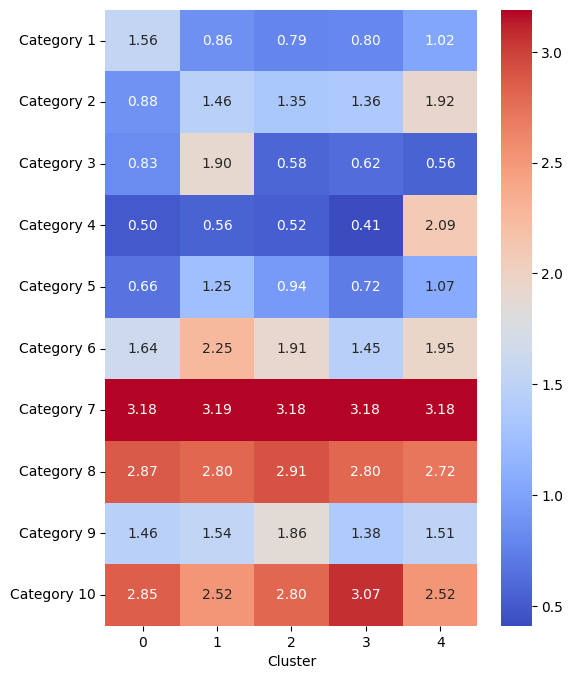

In [16]:
# Визуализация средних оценок по кластерам
plt.figure(figsize=(6, 8))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

*Выведем график Boxplot*

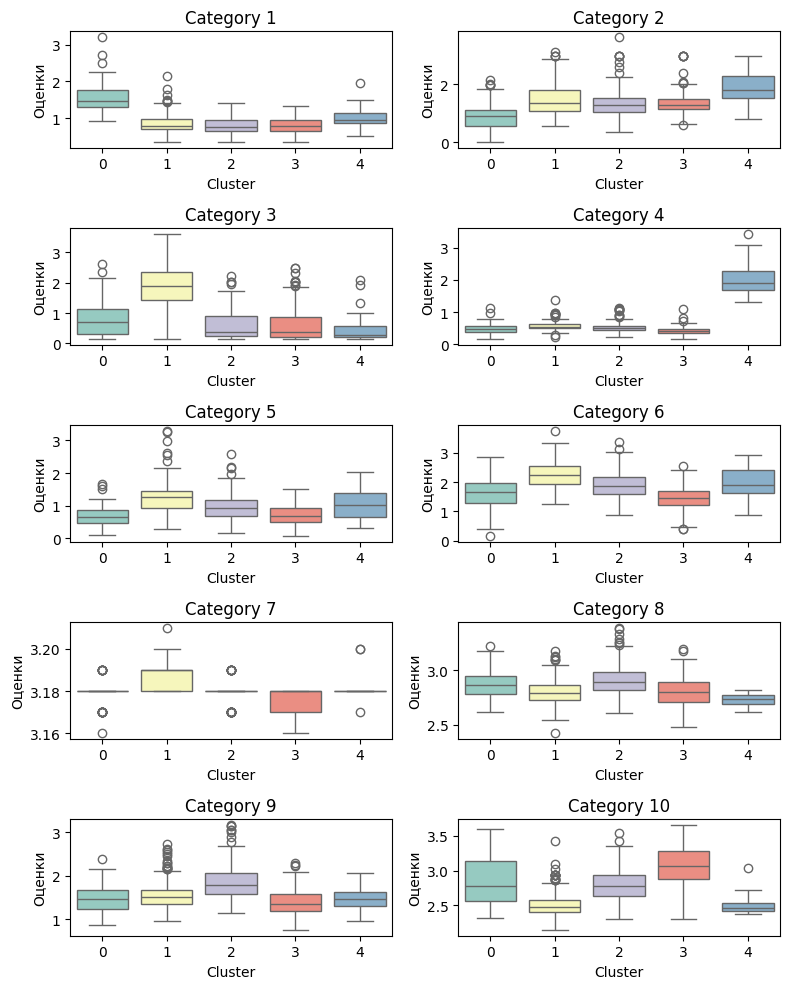

In [17]:
# Построение ящиков с усами для каждой категории с разбивкой по кластерам
plt.figure(figsize=(8, 10))
for i, category in enumerate(features, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Cluster', y=category, data=df_full, palette='Set3')
    plt.title(category)
    plt.ylabel('Оценки')

plt.tight_layout()
plt.show()

*Проведем статистический вывод (попарный t–критерий)*

In [18]:
# Категории 1 (арт-галереи) и Категории 3 (сок-бары)
feature_1 = 'Category 1'
feature_3 = 'Category 3'

# Проведение попарного t-критерия между двумя выбранными признаками
t_stat, p_value = ttest_ind(df_full[feature_3], df_full[feature_1])

t_stat, p_value

(4.404578554601862, 1.1171184895431736e-05)

In [19]:
# Категория 7 (парки/места для пикников) и Категория 10 (религиозные учреждения)
feature_7 = 'Category 7'
feature_10 = 'Category 10'

# Проведение попарного t-критерия между двумя выбранными признаками
t_stat, p_value = ttest_ind(df_full[feature_7], df_full[feature_10])

t_stat, p_value

(37.17099261361245, 2.6578949124415773e-229)

Результаты показывают статистически значимую разницу между оценками пользователей. Значение p крайне мало, что позволяет надёжно отвергнуть нулевую гипотезу о равенстве средних оценок в этих категориях. Это указывает на значительные различия в предпочтениях пользователей.

*Охарактеризем кластеры: какие сходные интересы имеют пользователи в каждой группе*

* Кластер 0: пользователи ставят высокие оценки арт-галереям, пляжам и религиозным учреждениям;
* Кластер 1: пользователи ставят высокие оценки соко-барам, музеям, курортам и паркам;
* Кластер 2: пользователи ставят высокие оценки пляжам и кинотеатрам;
* Кластер 3: пользователи ставят высокие оценки религиозным учреждениям, а остальные места низко оценивают;
* Кластер 4: пользователи ставят высокие оценки танцевальным клубам, ресторанам, музеям и курортам.

*Удалим признак 'Category 7' (т.к. он имеет высокую корреляцию с другими признаками) и повторим Кластеризацию*

In [20]:
# Удаляем столбец 'Category 7' и копируем результат
df_cut = df.drop(columns=['Category 7']).copy()

*Выведем признаки*

In [21]:
features = df_cut.columns[1:]
features

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 8', 'Category 9', 'Category 10'],
      dtype='object')

*Выполним масштабирование признаков*

In [22]:
# Масштабирование признаков
data_scaled = scaler.fit_transform(df_cut[features])

# Создание датасета с масштабироваными признаками
df_scaled = pd.DataFrame(data_scaled, columns=features)

# Выведем информацию по количественным признакам
df_scaled.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 8,Category 9,Category 10
count,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,-2.718914e-17,5.437827e-17,-8.972415e-17,5.147810e-16,-4.440892e-17,1.640411e-16,-1.500840e-15,-2.356392e-16,-9.153676e-16
std,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00
min,-1.693043e+00,-2.829519e+00,-1.120656e+00,-1.368082e+00,-2.012171e+00,-3.157826e+00,-3.020048e+00,-2.275906e+00,-2.052279e+00
25%,-6.830819e-01,-5.702755e-01,-9.430372e-01,-4.381438e-01,-6.855674e-01,-7.100398e-01,-6.916798e-01,-7.118768e-01,-8.070103e-01
50%,-1.934040e-01,-1.518970e-01,-2.452487e-01,-1.162422e-01,-9.088308e-02,-7.954928e-02,-1.095877e-01,-8.077737e-02,-5.984914e-02
75%,3.880885e-01,4.338329e-01,7.094529e-01,1.698925e-01,5.952912e-01,6.622042e-01,5.452658e-01,5.228829e-01,7.495755e-01
max,7.121160e+00,4.784969e+00,3.307129e+00,1.039921e+01,5.398511e+00,3.555043e+00,4.037818e+00,4.391797e+00,2.679742e+00


*Определение оптимального числа кластеров*

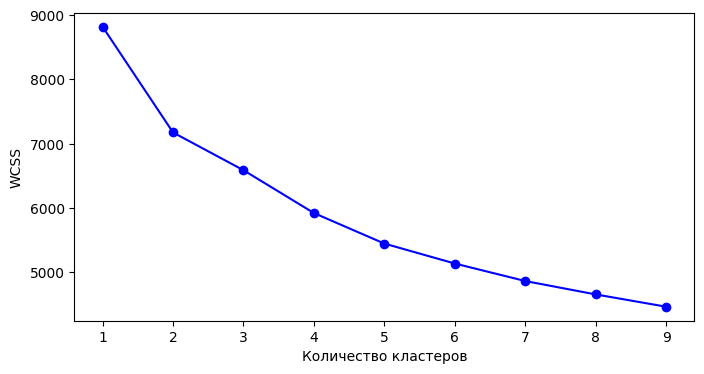

In [23]:
# Расчет WCSS
wcss = calculate_wcss(df_scaled)

# Визуализация расчета WCSS
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

*Разобьм датасет на пять кластеров*

In [24]:
# Применим кластеризацию с помощью k–средних
cluster_labels = kmeans.fit_predict(df_scaled)

# Выведем количество для каждого кластера
cluster_counts = Counter(sorted(cluster_labels))
for cluster, count in cluster_counts.items():
    print(f'Кластер {cluster}: {count}')

Кластер 0: 306
Кластер 1: 211
Кластер 2: 97
Кластер 3: 21
Кластер 4: 345


In [25]:
# Выполним PCA для сокращения данных до 3 измерений для визуализации
principal_components = pca.fit_transform(df_scaled)

# Создание нового датасета для визуализации
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels

# Создание 3D графика
fig = go.Figure()

# Добавление точек для каждого кластера
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(x=cluster_data['PC1'], y=cluster_data['PC2'], z=cluster_data['PC3'],
                               mode='markers',
                               name=f'Кластер {cluster}',
                               marker=dict(size=3)))

# Настройка внешнего вида графика
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(
                      xaxis_title='PC1',
                      yaxis_title='PC2',
                      zaxis_title='PC3'))

# Показ графика
fig.show()

*Вывод таблички со средними оценками, которые выставляют пользователи различным локациям*

In [26]:
# Добавление меток кластера к исходным данным
df_cut['Cluster'] = cluster_labels

# Вычисление средних значений для каждого кластера
cluster_means = df_cut.groupby('Cluster')[features].mean().round(2)

cluster_means

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 8,Category 9,Category 10
Cluster,,,,,,,,,
0,0.85,1.47,1.83,0.56,1.24,2.25,2.78,1.51,2.54
1,0.80,1.32,0.63,0.52,1.00,1.96,2.95,1.97,2.82
2,1.55,0.87,0.84,0.50,0.70,1.63,2.87,1.46,2.86
3,1.02,1.92,0.56,2.09,1.07,1.95,2.72,1.51,2.52
4,0.79,1.37,0.61,0.43,0.70,1.46,2.81,1.42,3.02


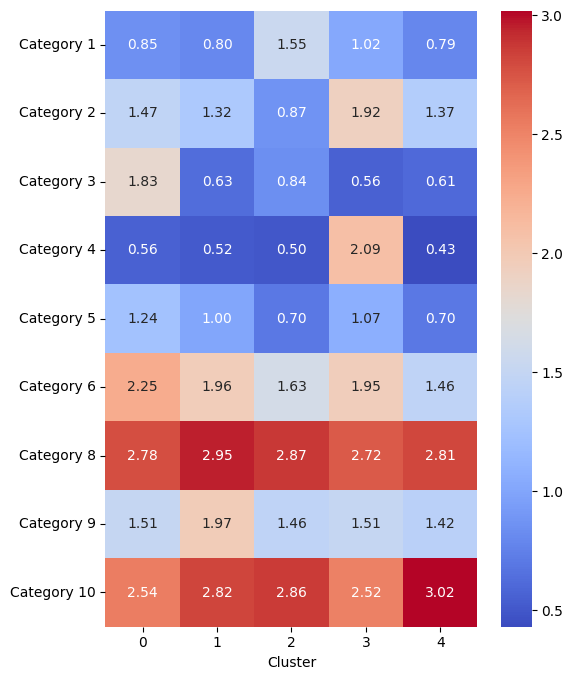

In [27]:
# Визуализация средних оценок по кластерам
plt.figure(figsize=(6, 8))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

*Выведем график Boxplot*

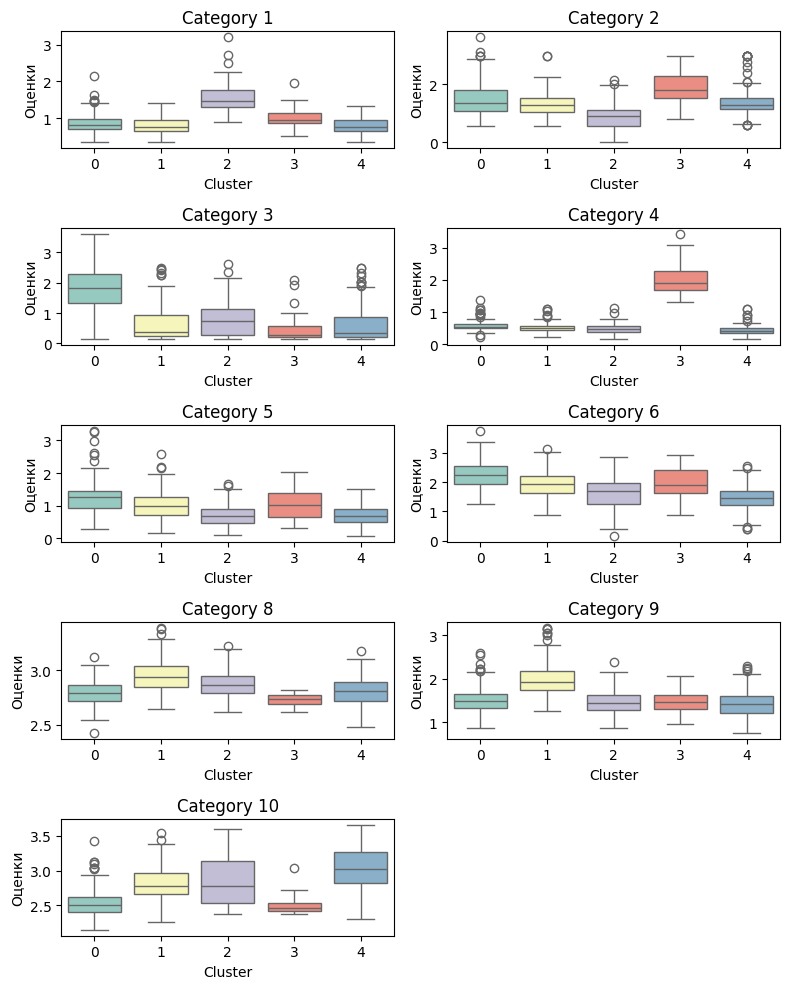

In [28]:
# Построение ящиков с усами для каждой категории с разбивкой по кластерам
plt.figure(figsize=(8, 10))
for i, category in enumerate(features, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Cluster', y=category, data=df_cut, palette='Set3')
    plt.title(category)
    plt.ylabel('Оценки')

plt.tight_layout()
plt.show()

*Проведем статистический вывод (попарный t–критерий)*

In [29]:
# Категории 1 (арт-галереи) и Категории 3 (сок-бары)
feature_1 = 'Category 1'
feature_3 = 'Category 3'

# Проведение попарного t-критерия между двумя выбранными признаками
t_stat, p_value = ttest_ind(df_cut[feature_3], df_cut[feature_1])

t_stat, p_value

(4.404578554601862, 1.1171184895431736e-05)

Результаты статистического вывода остались прежними.

Характеристики кластеров изменились.



*   Кластер 0: пользователи ставят высокие оценки соко-барам, музеям и курортам;
*   Кластер 1: пользователи ставят высокие оценки пляжам и театрам;
*   Кластер 2: пользователи ставят высокие оценки арт-галереям;
*   Кластер 3: пользователи ставят высокие оценки танцевальным клубам и ресторанам;
*   Кластер 4: пользователи ставят высокие оценки религиозным учреждениям.